# Movie Data Analysis
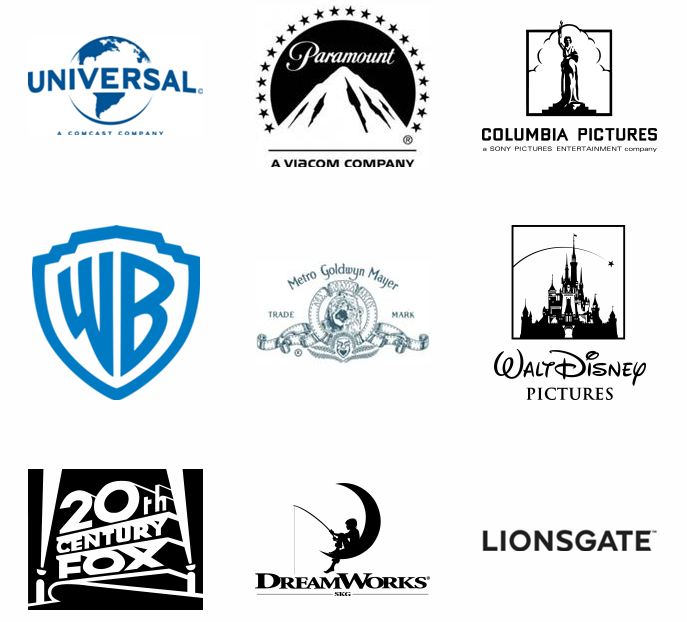

# Business Understanding 

Despite a slight setback due to Covid19. the movie industry has maintained relatively levels of profitability over the last decade. However, the highes salest have been limited to a select few outliers generated from the dominant studios in the industry. This data set explores the causes of the increase in outliers over time and offers three reccemondations that will ensure that Microsoft becomes one as well. One thing for sure is that the data has spoken and you will soon find that by : 

1. Having a culturally diversified set of products 
2. Ensuring release dates are around Christmas time 
3. Adopting the production cost models of the companies that are dominarting the industry 

Microsoft can begin to construct the strategies of competitive advantage needed to dominate the industry


In [587]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import sqlite3
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
! unzip -n zippedData/im.db.zip
import sqlite3
conn = sqlite3.connect("im.db")

Archive:  zippedData/im.db.zip




# Project Goal
Determine factors that can contribute to successful entry and profitability in Movie Industry



# Data Source and Exploration

My project uses data from :
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)
to explore the profitibilty and successors of the movie industry. I first explore the characteristics of movie studios that maintain a competitive advantage, then I explore the profitibility of movies based on characteristics such as genre, production budgeting, region and popularity using exploratory visualations and tools. 

# Analysis of Market Share Components Over Time

This graph represents the top movie studios in the industry. Disney and Sony has remained consistent in their market share proportions over the last ten years. This analysis reveals key characteristics in their business model that contributes to being profitable. 

This chart also offers insight into the shifts in marketshare over time, we see on one hand that 20th Century Fox is no longer a player in the market, whereas Disney, Sony, Warner Brothers and Univeral continue on strong. We will dive deeper into the dynamics of why the market is most profitable to those key businesses. Furthermore, the consistency of such studios is great news for Microsoft because it tells me that the industry is a brand-driven industry, the skill that Microsoft created! 

The last important thing to note is the increase in the "Others" group, this tells me that the barriers to entry have freed up and Microsoft, along with the fact that it is already a brand based company that everyone loves, is ready to enter the market NOW. 
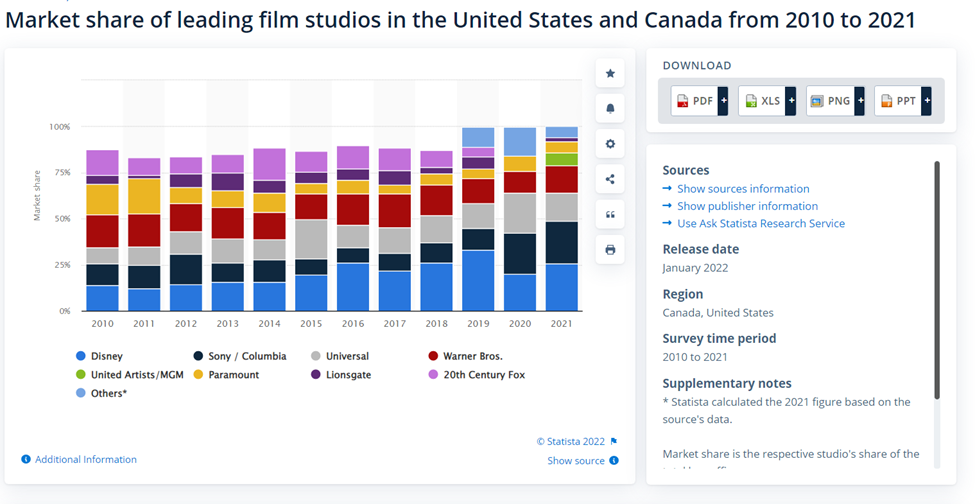

# Data Cleaning : Movie Sales Dataset 

For this dataset, there are three variables that I chose to focus on, studio , domestic_gross, and year. Both the studio variable and the domestic_gross variable contain null values, however, the percentage of null is extremely small, out of 3,387 observations, the studio variable only contains 5 null values and the domestic_gross variable contains 23. Furthermore, I will be utilizing another dataset that contain these variables. This dataset contains around 3000 observations and describes the gross domestic sales which is part of the metric of profitability that I will use for this analysis. 

In [588]:
#Domestic Gross Sales Information Over Time
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
gross_dom = bom_movie_gross

# Distribution of Gross Domestic Sales Over Last Decade
This scatter matrices offers a snapshot of US Gross Domestic Sales over time. Its imperative to note the increase in variability and outliers over time as I will explore the possible causes of such characteristics. Additionally, Gross Domestic Sales is skewed to the right which can be indicative of a domination in the market by studios that offer very particular movie types. 

This offers key insigts into the direction in which the movie industry is going over time. We see here that gross sales are increasing in variability and being rightly skewed indicates that the majority of sales are at the lower end of the scale, while over all sales remaining relatively constant over time.This is with the exception of 2018 where sales declined, however, given that these are domestic sales this decline can be the direct cause of an increase in foreign sales. 

The increase in variability and the increasingly number of outliers may be the cause of a shift in the industry or a concentration in movie preferences. I will dig deeper into the dataset to see if we can determine a source of such shifts.

In [589]:
#Combining time and domestic gross to analyze the relationship
gross_dom_tim = gross_dom[['year', 
                           'domestic_gross']]

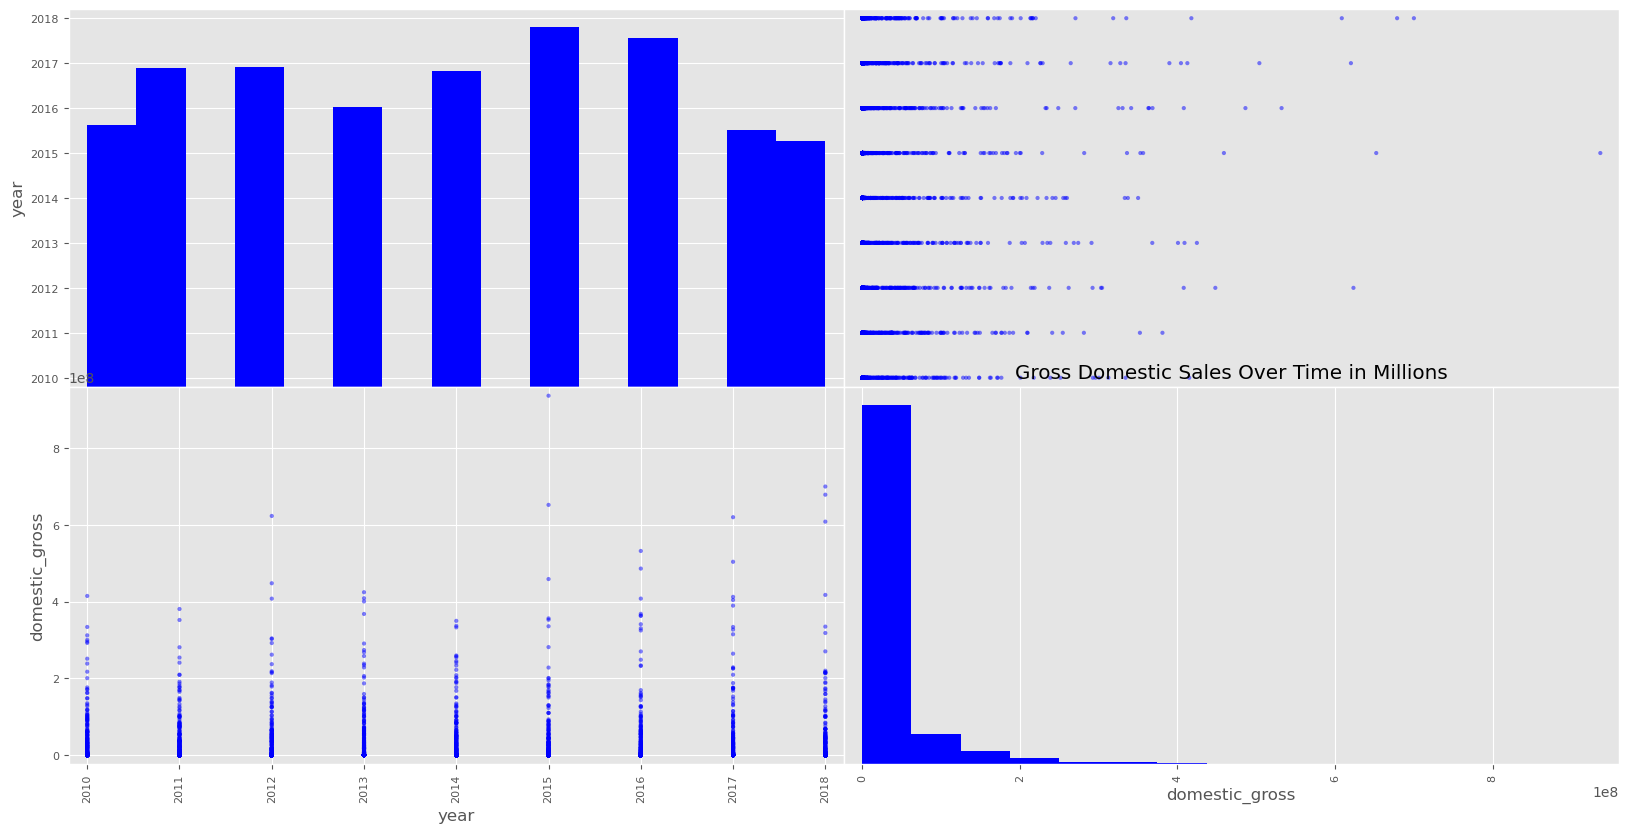

In [590]:
#Scatter Matrix of Distribution of Gross Domestic Sales Over Time (2010-2018)
pd.plotting.scatter_matrix(gross_dom_tim, 
                           color='blue', 
                           hist_kwds={'bins':15, 'color':'blue'})
plt.title('Gross Domestic Sales Over Time in Millions');

# Concluding Remarks  of Gross Sales Dataset  
 The very first data set documents domestic gross sales of movies from years 2010 to 2018. This offers key insigts into the direction in which the movie industry is going over time. We see here that gross sales are increasing in variability over time, being rightly skewed indicates that the majority of sales are at the lower end of the scale. The increase in variability and the number of outliers over time is indicative of a shift in the industry or a concentration in movie preferences. We will dig deeper into the dataset to see if we can determine a source of such shifts. 

# Data Cleaning of Gross Sales Dataset 
This first data set has no duplicates or extraneous variables

In [591]:
#Duplicate Check
duplicates = gross_dom[gross_dom.duplicated()]
print(len(duplicates))
duplicates.head();

0


In [592]:
#Extraneous Data Check
for col in gross_dom.columns:
    print(col, 
          '\n', 
          gross_dom[col].value_counts(normalize=True).head(), '\n\n')

title 
 Bluebeard               0.000590
Before We Go            0.000295
Knock Knock             0.000295
Kindergarten Teacher    0.000295
Welcome to Leith        0.000295
Name: title, dtype: float64 


studio 
 IFC      0.049083
Uni.     0.043465
WB       0.041396
Fox      0.040213
Magn.    0.040213
Name: studio, dtype: float64 


domestic_gross 
 1100000.0    0.009527
1000000.0    0.008931
1300000.0    0.008931
1200000.0    0.007443
1400000.0    0.006847
Name: domestic_gross, dtype: float64 


foreign_gross 
 1200000    0.011291
1100000    0.006873
4200000    0.005891
1900000    0.005891
1300000    0.005400
Name: foreign_gross, dtype: float64 


year 
 2015    0.132861
2016    0.128727
2012    0.118099
2011    0.117803
2014    0.116622
Name: year, dtype: float64 




# The Competition 

In [593]:
# The Competition : There are alot of Studios that exist
gross_dom.studio.unique()
len(bg.studio.unique())

258

In [594]:
#The variance in the data set is massive with a range of over $9,000,000,000
gross_dom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


# Most Profitable Movies and their Studios from last decade 

Despite the range of dates from 2010 to 2018, these movies are very old, this indicates to me that when a movie is produced, the longevity and quality is what matters the most to consumers in this industry.

In [595]:
#Disney , Warner Brothers and Paramount Pictures 
gross_dom.head().sort_values(by='domestic_gross', 
                             ascending=False)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# Analysis of Rightly Skewed Data 
The righly skewed data indicates that very few movies are at the higher end of the tails. Furthermore, the range between the majority of these movies and the outliers is massive. It is good to note that as you will see in the next few graphs, profitability is slightly more normally distributed but still skewed.There is significant data that offers key insights in to how to be among the outliers like Disney Studio(BV). First it appears that studios that are most profitable produce lower quantities of movies and more quality movies. For example, Disney created Toy Story 3 in 2010 and despite significant increases in inflation it still rendered the highest in Gross Sales in this data set time frame of 10 years. Moreover, the amount of time that elaspes between each Toy Story offers insight into the amount of time, effort and meaning they place in the movies they produce. 

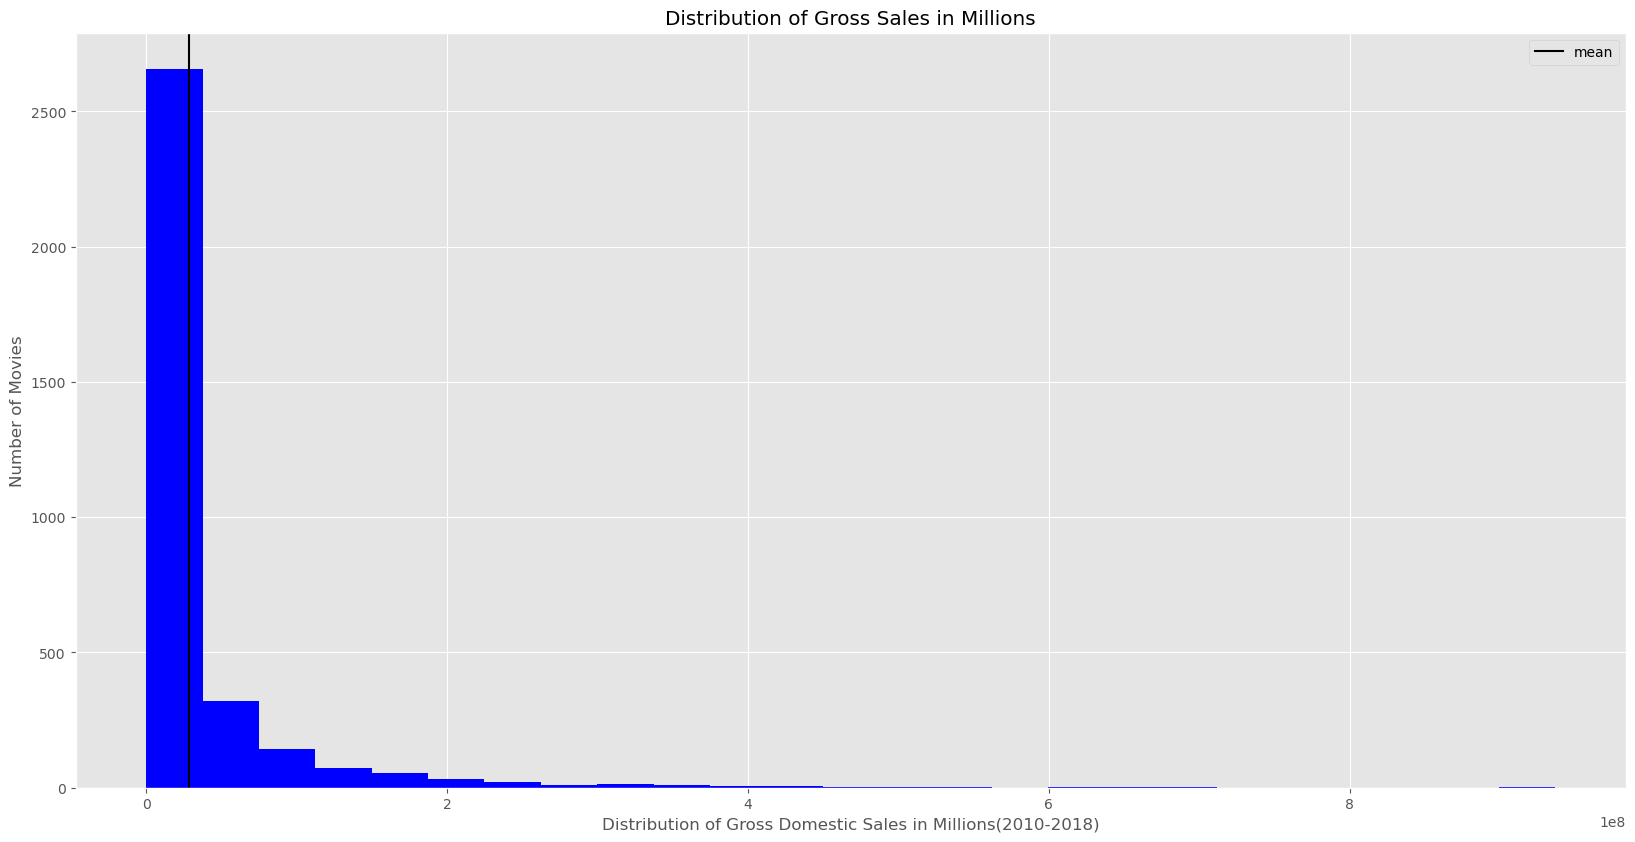

In [596]:
#Domestic Gross Sales is rightly skewed which indicates that the majority of our dataset is on the lower end of sales
plt.hist(gross_dom.domestic_gross, color='blue', bins=25)
plt.title('Distribution of Gross Sales in Millions')
plt.axvline(gross_dom.domestic_gross.mean(), color='black', label='mean')
plt.xlabel('Distribution of Gross Domestic Sales in Millions(2010-2018)')
plt.ylabel('Number of Movies')
plt.legend();

## Data Cleaning : Time, Gross Sales and Popularity Dataset

In [597]:
#Populartity(Ratings) Data Check
tmbd = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [598]:
#Profit
#Numerical Metric : Profitability : I will calculate Profit and add to the dataset 
tn = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data Manipulation : Numeric Dataset
Here I will prepare my variables for analysis by converting them to float variables 

In [599]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [600]:
#Datetotime
tn['release_date'] = pd.to_datetime(tn['release_date'])

In [601]:
#Index by Month and Year
tn['year'] = pd.DatetimeIndex(tn['release_date']).year
tn['month'] = pd.DatetimeIndex(tn['release_date']).month

In [602]:
#Replacing Unwanted String Objects within Values 
tn['worldwide_gross'] = tn['worldwide_gross'].str.replace(r'\D', '')
tn['domestic_gross'] = tn['domestic_gross'].str.replace(r'\D', '')
tn['production_budget'] = tn['production_budget'].str.replace(r'\D', '')
tn['domestic_gross'] = tn['domestic_gross'].str.replace(r'\D', '')

In [603]:
#Cast to float 
tn['worldwide_gross'] = tn['worldwide_gross'].astype(float, errors = 'raise')
tn['domestic_gross'] = tn['domestic_gross'].astype(float, errors = 'raise')
tn['production_budget'] = tn['production_budget'].astype(float, errors = 'raise')

In [604]:
#Data Manipulation : Preparing to Merge with other datasets
tn.rename(columns={"movie": "title"}, inplace=True)

In [605]:
#Add Profit Colum
tn['Profit'] = tn['worldwide_gross'] - tn['production_budget']

# Recommendation # 1 
It appears that when looking at the worldwide gross sales by the month across this data frame, movies made the most money during December. Therefore, when Microsoft does begin to create movies, the majority of their release dates should be during these months. Additionally, the months of January and September should be avoided

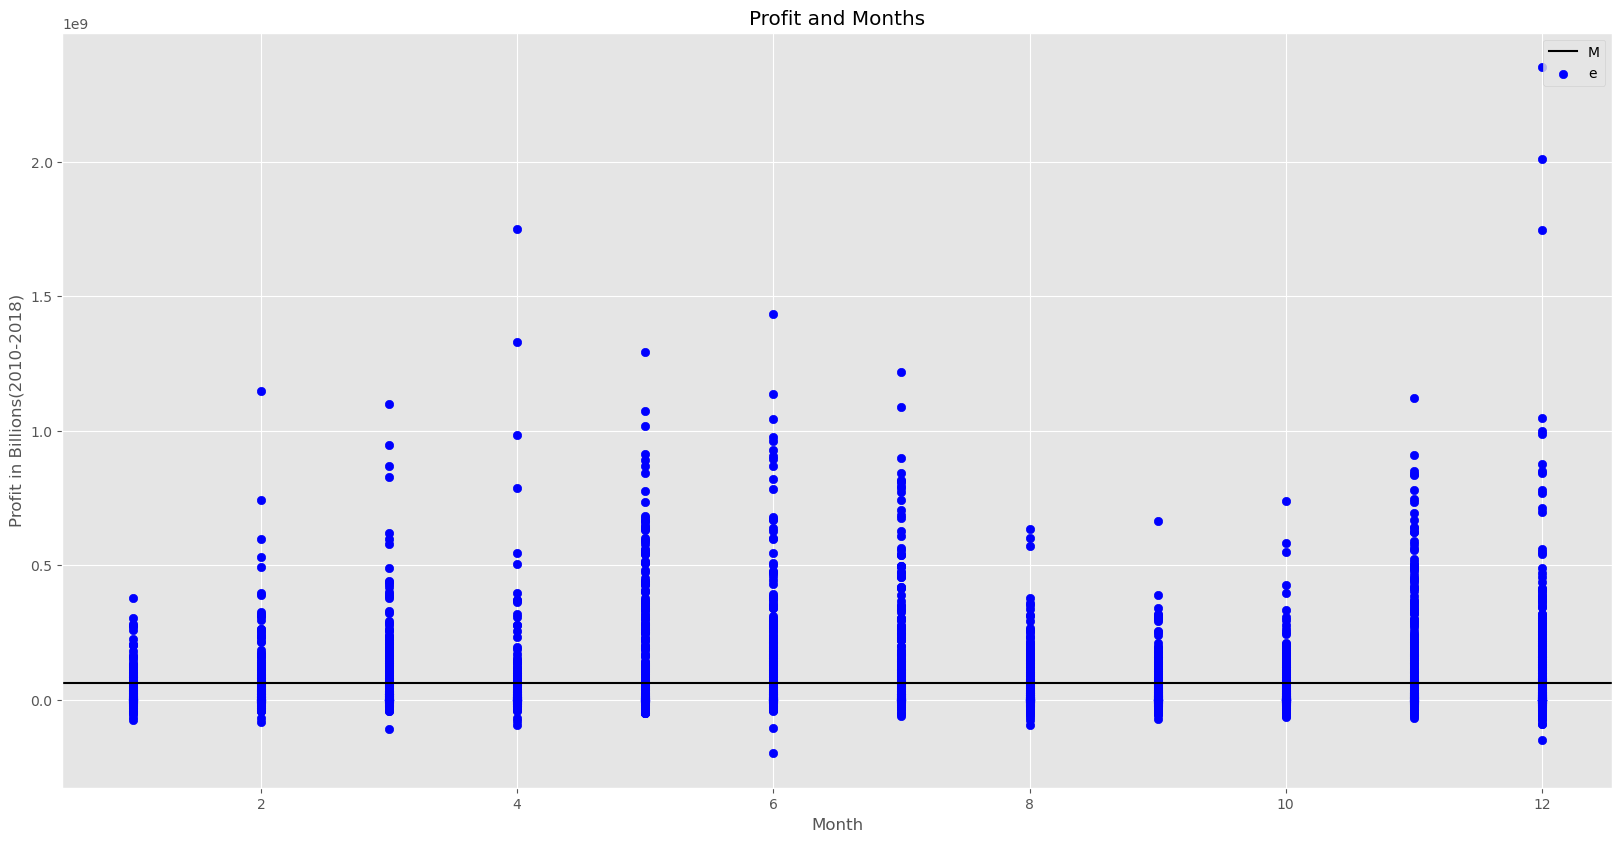

In [606]:
#Worldwide Gross Sales by Month 
plt.scatter(tn.month, tn.Profit, color='blue')
plt.title('Profit and Months')
plt.axhline(tn.Profit.mean(),  color='black', label='mean')
plt.ylabel('Profit in Billions(2010-2018)')
plt.xlabel('Month')
plt.legend('Mean');

# Data Manipulation for Recomendation # 2

In [461]:
#Range of Numeric Metric Dates as as far 1920
tn.year.value_counts()

2015    338
2010    274
2008    264
2006    260
2014    255
       ... 
1937      1
1927      1
1947      1
1958      1
1920      1
Name: year, Length: 96, dtype: int64

In [462]:
#Subselecting Recent Data for Numeric Metric
tn1 = tn.loc[tn['year'] > 2009 ]
tn1['roi'] = tn1['worldwide_gross']/tn1['production_budget']
tn1['foreign_gross'] = tn1['worldwide_gross'] - tn1['domestic_gross']
tn1['Profit'] =  tn1['worldwide_gross'] - tn1['production_budget']

In [463]:
tn1.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year,month,Profit,roi,foreign_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,6.350639e+08,2.546673,8.046000e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,-2.002376e+08,0.427892,1.070000e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1.072414e+09,4.243841,9.440081e+08
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,9.997217e+08,4.153696,6.965404e+08
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,12,1.747311e+09,6.710167,1.116649e+09


In [464]:
tn1.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year', 'month', 'Profit', 'roi', 'foreign_gross'],
      dtype='object')

In [465]:
tn1.rename(columns={'movie': 'title'}, inplace=True)

In [466]:
#Summary Statistic of Numeric Metric Profit
tn1.describe()

,id,production_budget,domestic_gross,worldwide_gross,year,month,Profit,roi,foreign_gross
count,2194.000000,2.194000e+03,2.194000e+03,2.194000e+03,2194.00000,2194.000000,2.194000e+03,2194.000000,2.194000e+03
mean,50.496809,3.653347e+07,4.411203e+07,1.118934e+08,2013.83546,6.902005,7.535989e+07,3.210431,6.778133e+07
std,28.508464,5.154415e+07,7.979735e+07,2.152202e+08,2.57895,3.537174,1.771111e+08,10.508915,1.420830e+08
min,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,2010.00000,1.000000,-2.002376e+08,0.000000,0.000000e+00
25%,26.000000,4.500000e+06,9.377150e+04,1.023780e+06,2012.00000,4.000000,-2.000000e+06,0.215742,1.322705e+05
50%,51.000000,1.690000e+07,1.279090e+07,2.752135e+07,2014.00000,7.000000,8.366398e+06,1.589178,1.067343e+07
75%,75.000000,4.200000e+07,5.332470e+07,1.132702e+08,2016.00000,10.000000,7.142336e+07,3.517032,5.973920e+07
max,100.000000,4.106000e+08,9.366622e+08,2.053311e+09,2020.00000,12.000000,1.748134e+09,416.564740,1.369319e+09


# Business Recommendation #2 : 

Here is a histogram of the factor contributing to Gross Sales within the last decade. As we see here, most of the profitabilty is coming from foreign countries. This is consistent with Disneys business model as they are increasingly diversifying their content and including cultures from all over the world. Foreign Gross Sales are greater at almost every point in the data set relative to Domestic Gross Sales. Including all the typical values in the summary statistic chart above. This analysis derives from over 2000 observations along a 10-year time period. In fact, all the outliers are from foreign_gross sales. We see a shift in the movie industry as Netflix, Sony and Disney began to pivot in a way that is consistent with market demand. Furthermore, more conservative studios are losing their place in the market as seen in the market share graph above. Therefore, my first reccomendation before diving deeper is remember to expand your products to include people from all backgrounds. As technology increases we are only going to become even more integrated with the rest of the world. Therefor we need a diverse product. 

In [470]:
x1 = tn1.foreign_gross
x2 =  tn1.domestic_gross

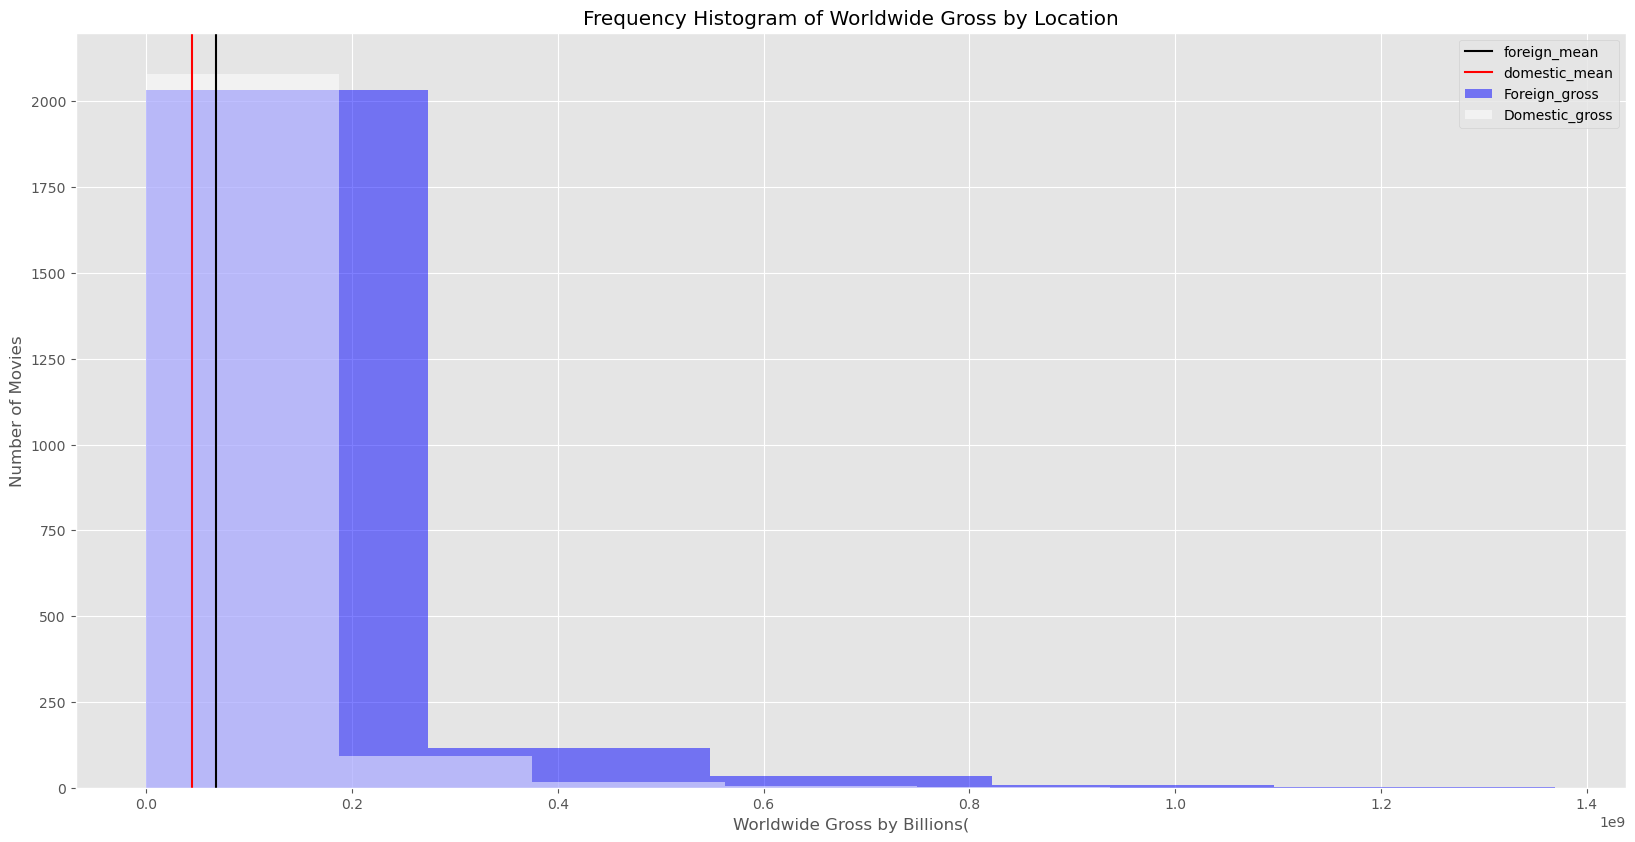

In [584]:
kwargs = dict(alpha=0.5, bins=5)

plt.hist(x1, **kwargs, color='b', label='Foreign_gross')
plt.hist(x2, **kwargs, color='w', label='Domestic_gross')
plt.axvline(x1.mean(),color='black', label='foreign_mean')
plt.axvline(x2.mean(), color='red', label='domestic_mean')
plt.gca().set(title='Frequency Histogram of Worldwide Gross by Location', ylabel='Number of Movies', xlabel='Worldwide Gross by Billions(')
plt.ylim(0,2200)
plt.legend();

We will dive deeper into the genre of data to determine if there are any correlations. Our numeric metric is slightly skewed to the right making the median a more representive typical value for this data set

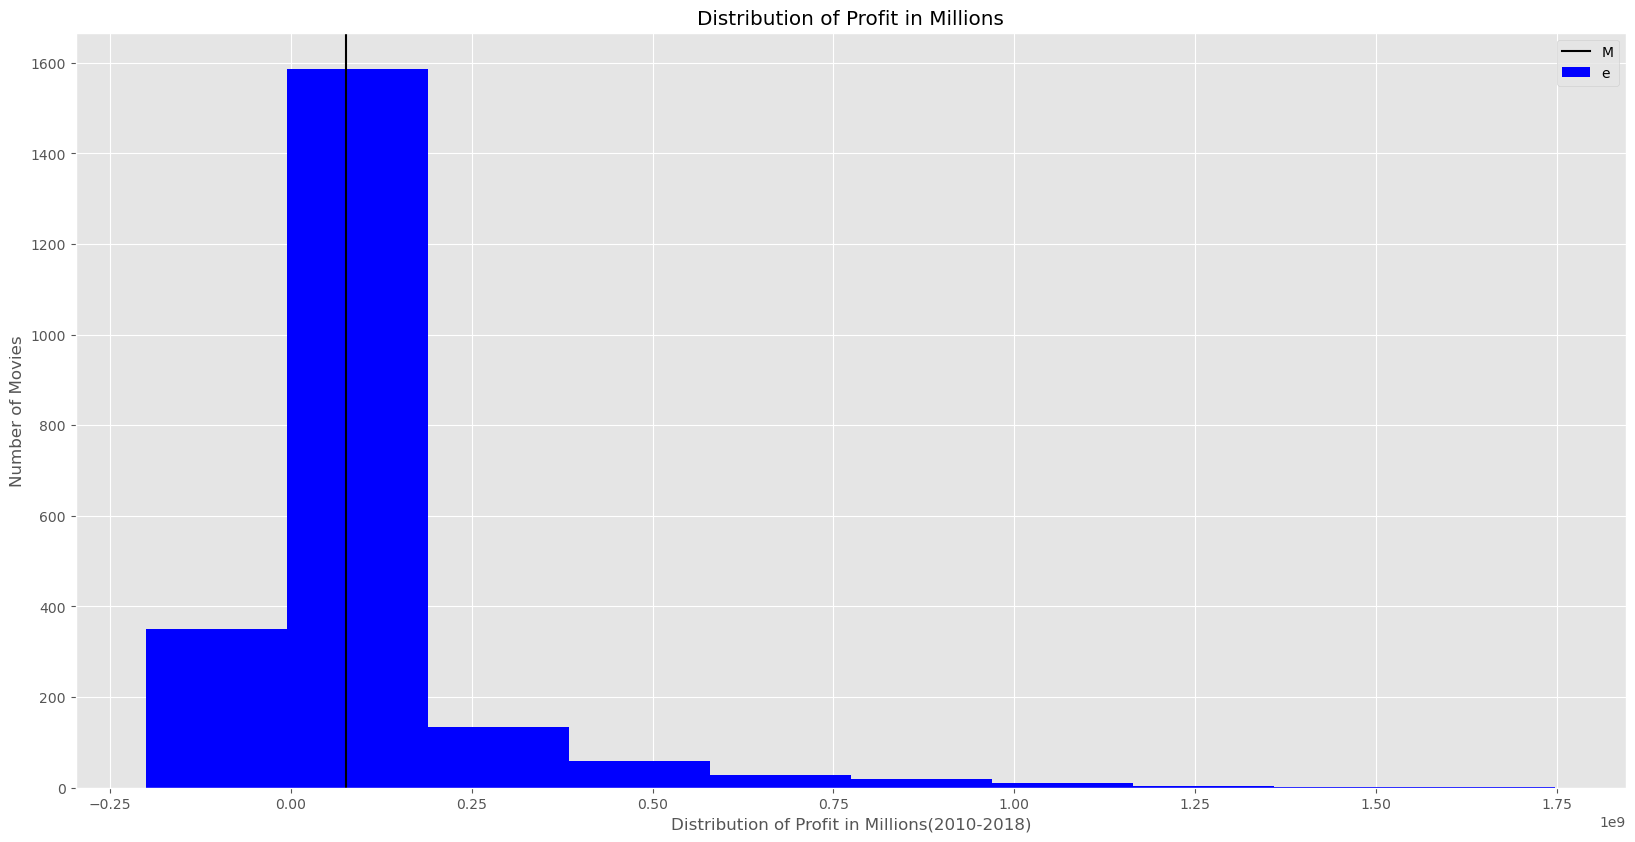

In [586]:
plt.hist(tn1.Profit, color='blue', bins=10)
plt.title('Distribution of Profit in Millions')
plt.axvline(tn1.Profit.mean(),color='black', label='mean')
plt.xlabel('Distribution of Profit in Millions(2010-2018)')
plt.ylabel('Number of Movies')
plt.legend('Mean');

# Data Manipulation for Recommendation 3

In [326]:
#Data Manipulation : Preparing to Merge with other datasets
tn.rename(columns={"movie": "title"}, inplace=True)

In [327]:
#Add Profit Columns
tn['Profit'] = tn['worldwide_gross'] - tn['production_budget']

In [328]:
#Merge Data for Budget and Popularity
td1 = tn.merge(tmbd, how='inner', on='title')
td1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_x               2385 non-null   int64         
 1   release_date_x     2385 non-null   datetime64[ns]
 2   title              2385 non-null   object        
 3   production_budget  2385 non-null   float64       
 4   domestic_gross     2385 non-null   float64       
 5   worldwide_gross    2385 non-null   float64       
 6   year               2385 non-null   int64         
 7   month              2385 non-null   int64         
 8   Profit             2385 non-null   float64       
 9   Unnamed: 0         2385 non-null   int64         
 10  genre_ids          2385 non-null   object        
 11  id_y               2385 non-null   int64         
 12  original_language  2385 non-null   object        
 13  original_title     2385 non-null   object        
 14  populari

In [329]:
td1.head()

,id_x,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,month,Profit,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,2.351345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,6.350639e+08,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1.072414e+09,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,4,1.748134e+09,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,11,3.559452e+08,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510


# Reccomendation # 3
When looking at the correlation matrix, there appears to be a relatively high correlation between production_budget and the popularity of a movie. Therefore, when microsoft begins to make movies, they should consider focusing more on acquiring the highest quality actor, directors and film crew as opposed to minimizing costs. 

In [330]:
#Relatively high correlation between production_budget and populrity 
td1.corr()

,id_x,production_budget,domestic_gross,worldwide_gross,year,month,Profit,Unnamed: 0,id_y,popularity,vote_average,vote_count
id_x,1.000000,-0.068922,-0.030259,-0.049557,-0.034168,-0.017621,-0.040568,0.025297,0.034761,-0.038721,0.012034,-0.028829
production_budget,-0.068922,1.000000,0.717331,0.794107,0.106725,0.012636,0.679251,0.021015,-0.146211,0.556587,0.127639,0.606330
domestic_gross,-0.030259,0.717331,1.000000,0.945834,0.037501,0.019314,0.941513,0.029504,-0.097650,0.536002,0.204104,0.705910
worldwide_gross,-0.049557,0.794107,0.945834,1.000000,0.072027,0.023834,0.985450,0.036395,-0.098295,0.563912,0.192811,0.723484
year,-0.034168,0.106725,0.037501,0.072027,1.000000,-0.000489,0.057128,0.182912,0.143043,0.166020,0.052057,0.082814
month,-0.017621,0.012636,0.019314,0.023834,-0.000489,1.000000,0.025246,0.028552,0.051113,0.047987,0.082154,0.062671
Profit,-0.040568,0.679251,0.941513,0.985450,0.057128,0.025246,1.000000,0.038071,-0.077805,0.525287,0.197130,0.704063
Unnamed: 0,0.025297,0.021015,0.029504,0.036395,0.182912,0.028552,0.038071,1.000000,0.850705,0.153856,0.060377,0.038223
id_y,0.034761,-0.146211,-0.097650,-0.098295,0.143043,0.051113,-0.077805,0.850705,1.000000,-0.075640,0.022488,-0.132112
popularity,-0.038721,0.556587,0.536002,0.563912,0.166020,0.047987,0.525287,0.153856,-0.075640,1.000000,0.300024,0.735966


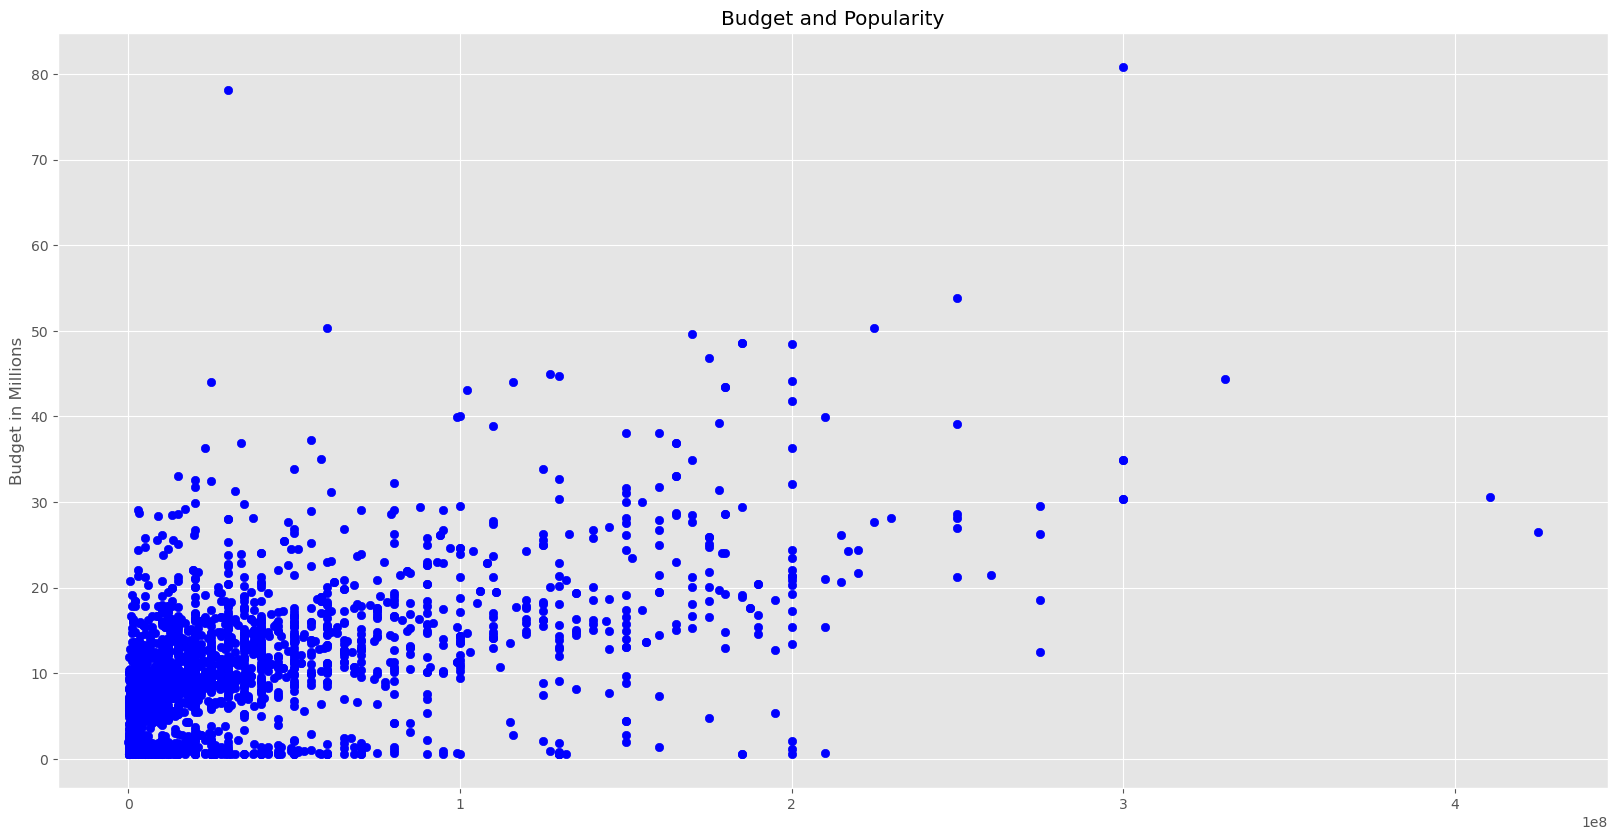

In [331]:
plt.scatter(td1.production_budget, td1.popularity, color='blue')
plt.title('Budget and Popularity')
plt.ylabel('Popularity Rank(2010-2018)')
plt.ylabel('Budget in Millions');

In [332]:
#This Dataset will be used to analyze the correlation between budget and runtime
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [333]:
#Data Preparation : Preparing to explode gere list
movie_basics['genre_lst'] = movie_basics['genres'].str.split(',')
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_lst
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [544]:
#Extracting data ranging from 2009 to 2021
movie_basics = movie_basics.loc[(movie_basics['start_year'] > 2009) & (movie_basics['start_year'] < 2021) ]


In [335]:
tn1.rename(columns={'movie': 'title'}, inplace=True)

In [569]:
movie_basics.rename(columns={'primary_title': 'title'}, inplace=True)

# Analysis of Production Costs 
It appears to be a correlation between production costs and popularity. This indicates that there are certtain production inputs that render more profits. One possible factor could the job categories of labor inputs. Here is the bar plot of the type of job relativr to profit generated. It appears that the director, writer and archive sounds generate the highest profit 

In [570]:
#Job Category Dataset
principals = pd.read_sql("SELECT * FROM principals;", conn)
principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [571]:
#Merged with movie_basics dataset
t3 = movie_basics.merge(principals, how='inner', on='movie_id')

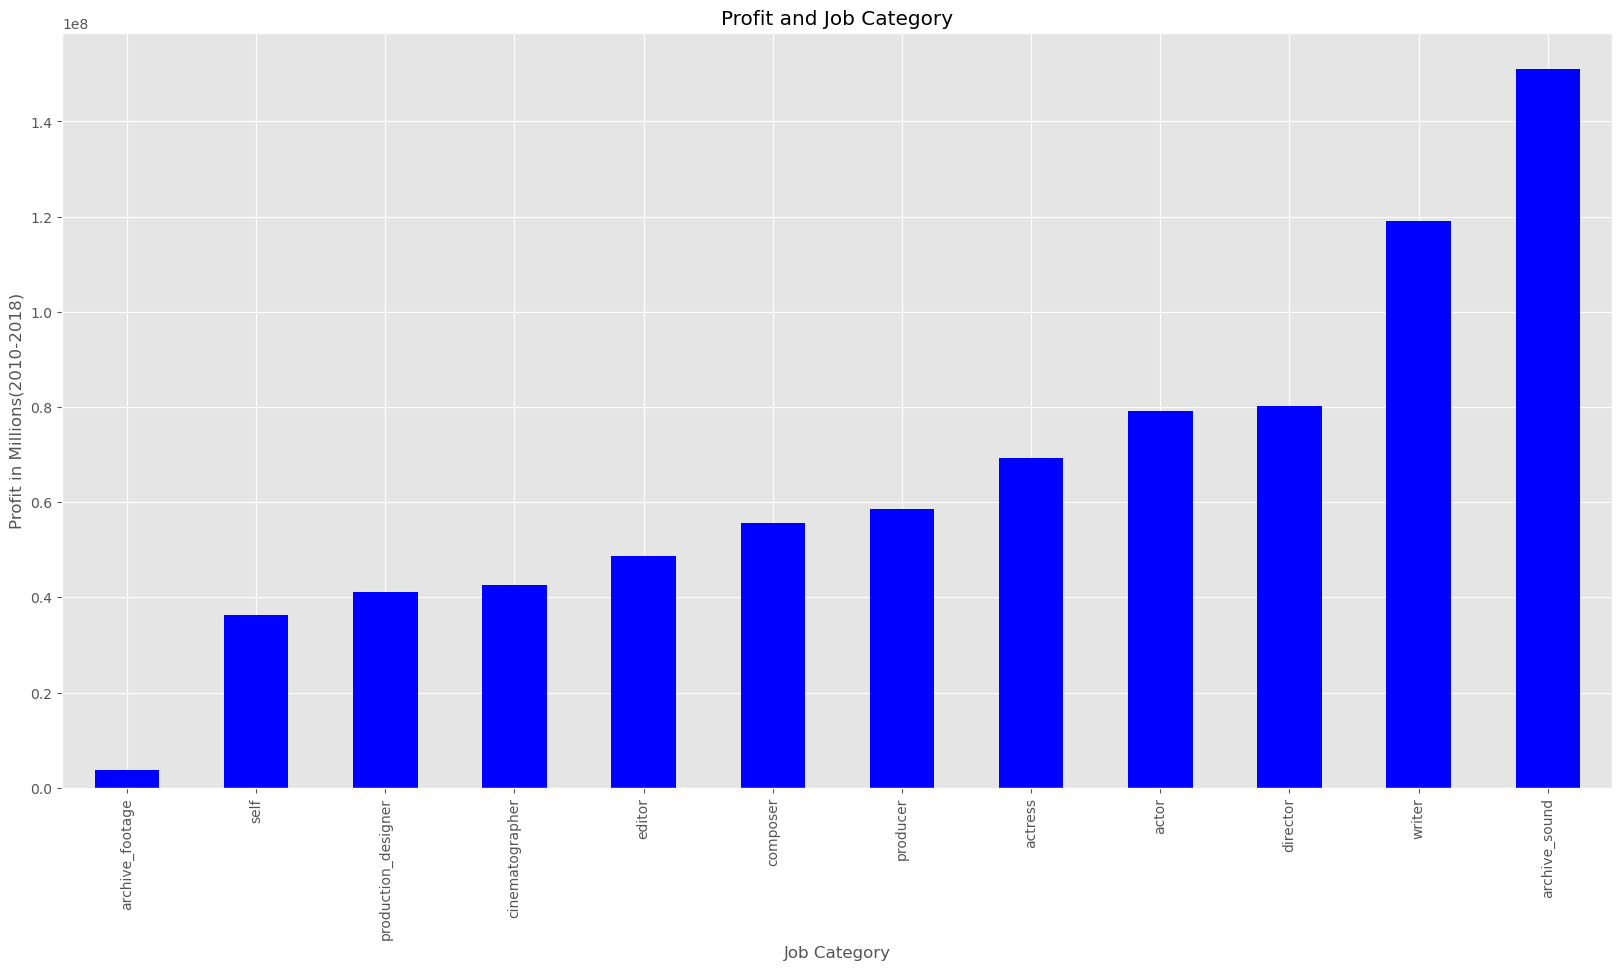

In [572]:
#Merged with profit dataset to generate the relationship between profir and categoty
t4 = t3.merge(tn1, how='inner', on='title')
t4_bar = t4.category.value_counts()
t4h = t4.groupby(['category'])['Profit'].mean().sort_values()
t4h.plot(kind='bar', color='blue')
plt.ylabel('Profit in Millions(2010-2018)')
plt.xlabel('Job Category')
plt.title('Profit and Job Category');

# Conclusions 

Overall the three key reccomendations are : 
1. Having a culturally diversified set of products 
2. Ensuring release dates are around Christmas time 
3. Adopting the production cost models of the companies that are dominarting the industry 
Furthermore, some significant factors that should be included in the cost models should be focusing more on quality inputs, which would go agaisnt typical cost minimization strategies. 

In [609]:
conn.close;